In [ ]:
import numpy as np 

In [ ]:
import networkx as nx


In [ ]:
import pandas as pd

In [ ]:
import json


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from collections import Counter


In [ ]:
import community


In [ ]:
import os


In [ ]:
g_hr = nx.read_edgelist('/content/HR_edges.csv', delimiter = ',')


In [ ]:
g_hu = nx.read_edgelist('/content/HU_edges.csv', delimiter = ',')


In [ ]:
g_ro = nx.read_edgelist('/content/RO_edges.csv', delimiter = ',')


In [ ]:
print('CROASIA GRAPH')


CROASIA GRAPH


In [ ]:
def general_graph_properties(g):
    ### (a) Basic properties of the network ### 

    # Number of nodes
    print("The network has", g.number_of_nodes(), "nodes")

    # Number of edges
    print("The network has", g.number_of_edges(), "edges")

    # Clustering coefficient
    print("The average clustering coefficient of the original network is","%.2f" %nx.average_clustering(g))

    # Is the graph connected
    print("Is the graph connected?", nx.is_connected(g))

    # i. Number of connected components
    print("The network has", nx.number_connected_components(g), "connected components")

    # Distribution of the sizes of the connected components

    # List of connected components sizes 
    sizes = [len(c) for c in sorted(nx.connected_components(g), 
                            key=len, 
                            reverse=True)]

    # plot the distribution of connected components
    plt.hist(np.log(sizes), color = 'blue')
    plt.title('Distribution of connected components size')
    plt.xlabel('Size')
    plt.ylabel('Count')
    plt.show()

    # The giant connected component (GCC) 
    lcc = max(nx.connected_components(g), key=len) # CC Node IDs
    x =[g.subgraph(c) for c in nx.connected_components(g)]
    gcc = max(x, key=len)

    print("The giant connected component has",gcc.number_of_nodes(), "nodes")
    print("The giant connected component has",gcc.number_of_edges(), "edges")
    
    frac_nodes = gcc.number_of_nodes()/g.number_of_nodes()
    frac_edges = gcc.number_of_edges()/g.number_of_edges()

    print("The giant connected component accounts for",
          "%.2f" % frac_nodes, "% of the network's nodes")
    print("The giant connected component has",
          "%.2f" % frac_edges,"% of the network's edges")

    ### Analysis of the degree distribution

    ## Degrees ##
    # Degrees list
    degree = list(g.degree())
    d = [j for i,j in degree]
    d = sorted(d, reverse=True)

    print("The minimum degree of the graph is", np.min(d))
    print("The maximum degree of the graph is", np.max(d))
    print("The median degree of the graph is","%.0f" % np.median(d))
    print("The mean degree of the graph is","%.2f" %np.mean(d))

    # Degree distribution visualization
    plt.hist(np.log(d), color = 'blue')
    plt.title('Distribution of degrees')
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.show()
    ### Triangles ###

    # Total number of triangles in the GCC
    triangles = nx.triangles(gcc).values()
    triangles = list(triangles)
    t = np.sum(triangles)

    print("The GCC contains", t, "triangles")

    # Triangle participation distribution
    triangles = [x for x in triangles if x != 0] 

    plt.hist(np.log(triangles), color = 'blue')
    plt.title('Triangle participation distribution')
    plt.xlabel('log(Triangles)')
    plt.ylabel('Count')
    plt.show()


The network has 54575 nodes
The network has 498203 edges
The average clustering coefficient of the original network is 0.14
Is the graph connected? False
The network has 2 connected components


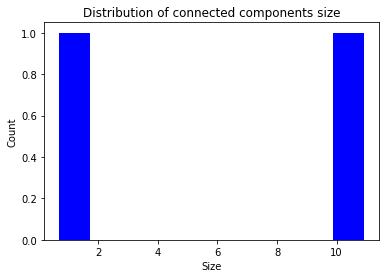

The giant connected component has 54573 nodes
The giant connected component has 498202 edges
The giant connected component accounts for 1.00 % of the network's nodes
The giant connected component has 1.00 % of the network's edges
The minimum degree of the graph is 1
The maximum degree of the graph is 420
The median degree of the graph is 13
The mean degree of the graph is 18.26


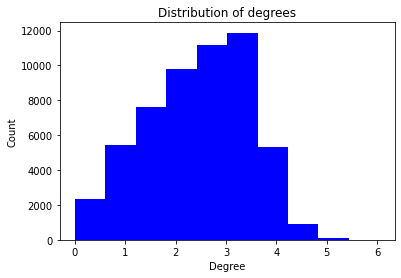

The GCC contains 1992996 triangles


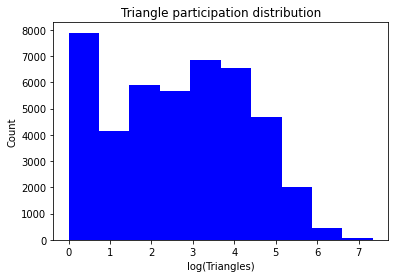

In [ ]:
general_graph_properties(g_hr)

HUNGARY GRAPH
The network has 47540 nodes
The network has 222888 edges
The average clustering coefficient of the original network is 0.12
Is the graph connected? False
The network has 2 connected components


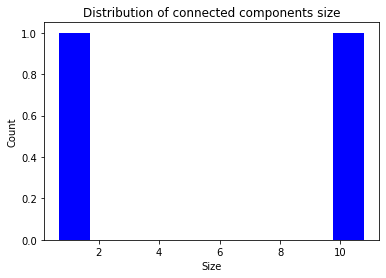

The giant connected component has 47538 nodes
The giant connected component has 222887 edges
The giant connected component accounts for 1.00 % of the network's nodes
The giant connected component has 1.00 % of the network's edges
The minimum degree of the graph is 1
The maximum degree of the graph is 112
The median degree of the graph is 8
The mean degree of the graph is 9.38


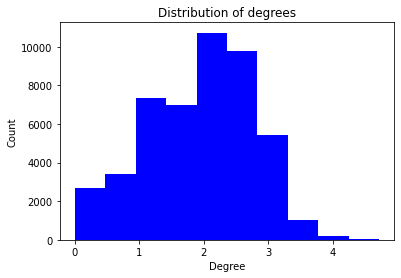

The GCC contains 294261 triangles


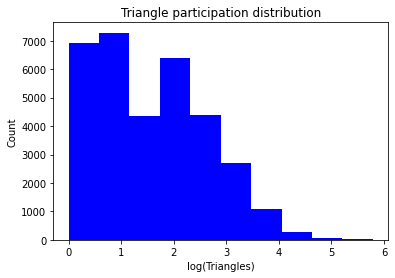

In [ ]:
print('HUNGARY GRAPH')
general_graph_properties(g_hu)

ROMANIA GRAPH
The network has 41775 nodes
The network has 125827 edges
The average clustering coefficient of the original network is 0.09
Is the graph connected? False
The network has 2 connected components


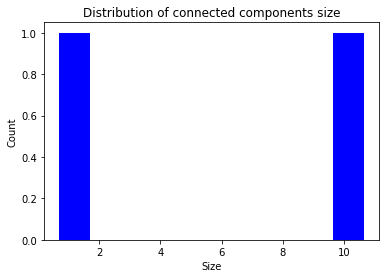

The giant connected component has 41773 nodes
The giant connected component has 125826 edges
The giant connected component accounts for 1.00 % of the network's nodes
The giant connected component has 1.00 % of the network's edges
The minimum degree of the graph is 1
The maximum degree of the graph is 112
The median degree of the graph is 5
The mean degree of the graph is 6.02


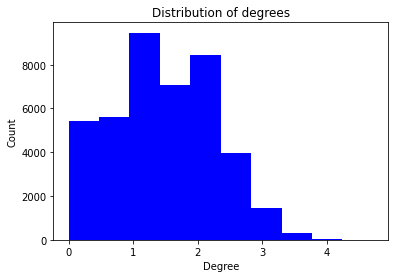

The GCC contains 95373 triangles


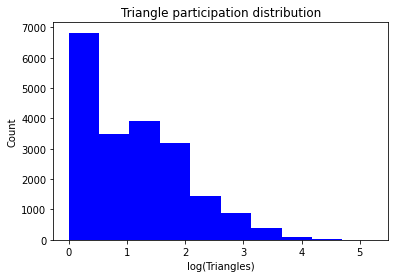

In [ ]:
print('ROMANIA GRAPH')
general_graph_properties(g_ro)

In [ ]:
hu = []
for line in open('/content/HU_genres.json','r',encoding='utf-8'):
    hu.append(json.loads(line))

ro = []
for line in open('/content/RO_genres.json','r',encoding='utf-8'):
    ro.append(json.loads(line))
    
hr = []
for line in open('/content/HR_genres.json','r',encoding='utf-8'):
    hr.append(json.loads(line))

hu_df = pd.DataFrame(hu)
hu_df = hu_df.T
hr_df = pd.DataFrame(hr)
hr_df = hr_df.T
ro_df = pd.DataFrame(ro)
ro_df = ro_df.T

def count_musics(train_data):
    """Counts in given df."""
    
    c = Counter()
    for recipe in train_data[:,0]:
        for ingredient in recipe:
            c.update([ingredient])
    
    return c

all_count_hu = count_musics(hu_df.iloc)
all_count_hr = count_musics(hr_df.iloc)
all_count_ro = count_musics(ro_df.iloc)

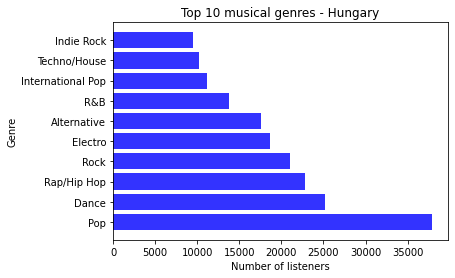

In [ ]:

most_common = all_count_hu.most_common(10)

most_common

top10_all = [row[1] for row in most_common] 


plt.barh(range(10), top10_all, align = 'center', color='blue', alpha = 0.8)

plt.yticks(range(10),[row[0] for row in most_common])

plt.title('Top 10 musical genres - Hungary' )
plt.xlabel('Number of listeners')
plt.ylabel('Genre')

plt.show()

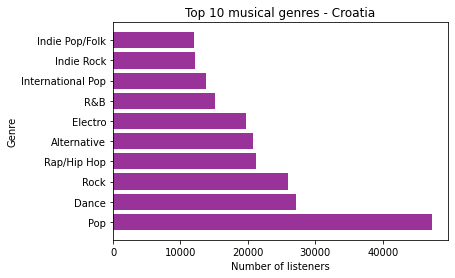

In [ ]:

most_common = all_count_hr.most_common(10)
most_common

top10_all = [row[1] for row in most_common] 


plt.barh(range(10), top10_all, align = 'center', color='purple', alpha = 0.8)

plt.yticks(range(10),[row[0] for row in most_common])

plt.title('Top 10 musical genres - Croatia' )
plt.xlabel('Number of listeners')
plt.ylabel('Genre')
plt.show()

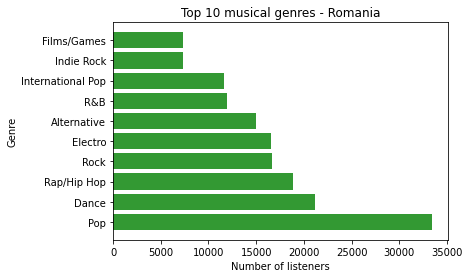

In [ ]:
most_common = all_count_ro.most_common(10)
most_common

top10_all = [row[1] for row in most_common] 


plt.barh(range(10), top10_all, align = 'center', color='green', alpha = 0.8)

plt.yticks(range(10),[row[0] for row in most_common])

plt.title('Top 10 musical genres - Romania' )
plt.xlabel('Number of listeners')
plt.ylabel('Genre')

plt.show()

In [ ]:
g = nx.read_edgelist('/content/HR_edges.csv', delimiter = ',')
partition = community.best_partition(g, randomize = False) #k: node, v: cluster to which node belongs

# best partition with key and value reversed
inverse_partition = {} #k: cluster to which node belongs, v: list of nodes

for part in list(set(partition.values())):
    inverse_partition[part]=[]
for node in partition.keys():
    inverse_partition[partition[node]].append(node)

num_clusters = len(set(inverse_partition.keys()))
    
print('Number of comunities = ',num_clusters)

Number of comunities =  26


nodes in graph  671
edges in graph  4112
positioning done


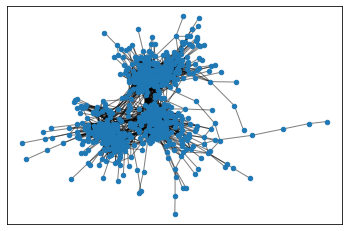

In [ ]:
n_part = 3

# list of nodes inside partition 'part'
list_nodes = inverse_partition[n_part]

# graph for selected cluster 
g1 = g.subgraph(list_nodes)
print('nodes in graph ',len(g1.nodes))
print('edges in graph ',len(g1.edges))

# layout
pos = nx.spring_layout(g1)
print('positioning done')

# plot
nx.draw_networkx_nodes(g1, pos, list_nodes, node_size = 20) #,node_color = str(count / size))
nx.draw_networkx_edges(g1,pos, alpha=0.5)
plt.show()

In [ ]:
def cluster_metrics(g,inverse_partition):

    internal_density = []
    edges_inside= []
    average_degree= []
    fomd= []
    tpr= []
    expansion= []
    conductance= []
    max_ofd= []

    for n_clust in range(1,len(inverse_partition.keys())):
        print('cluster number', n_clust)

        g1 = g.subgraph(inverse_partition[n_clust])
        m = len(g.edges)
        n = len(g.nodes)

        ms = len(g1.edges)
        ns = len(g1.nodes)

        border_edges = [e for e in g.edges if (e[0] in g1.nodes and e[1] not in g1.nodes) ]
        cs = len(border_edges)

        # Internal density
        internal_density.append(ms/(ns*(ns-1)/2))
        # Edges inside
        edges_inside.append(ms)

        # Average degree
        average_degree.append(2*ms/ns)

        # Fraction over median degree (FOMD) 
        dm = np.median([d[1] for d in list(g.degree)])
        fomd.append(len([n for n in g1.nodes if g1.degree[n] > dm])/ns)

        # Triangle participation ratio (TPR)
        triangles = nx.triangles(g)
        tpr.append(sum([1 if triangles[n]!=0 else 0 for n in g1.nodes])/ns)

        # Expansion
        expansion.append(cs/ns)

        # Conductance
        conductance.append(cs/(2*ms+cs))
        # # Maximum out degree fraction (Max ODF)
        out_degrees={}
        for e in g.edges:
            e0 = e[0] in g1.nodes
            e1 = e[1] in g1.nodes
            if e0 and not e1:
                out_degrees[e[0]] = out_degrees.get(e[0],0)+1
            if e1 and not e0:
                out_degrees[e[1]] = out_degrees.get(e[1],0)+1

        if out_degrees!={}: 
            max_ofd.append(max([out_degrees[u]/g.degree[u] for u in out_degrees.keys()]))
        else:
            max_ofd.append(0)

    clust_metrics = pd.DataFrame()
    clust_metrics['n_clust'] = range(1,num_clusters)
    clust_metrics['internal_density'] = internal_density
    clust_metrics['edges_inside'] =edges_inside
    clust_metrics['average_degree'] =average_degree
    clust_metrics['fomd'] =fomd
    clust_metrics['tpr'] =tpr
    clust_metrics['expansion'] =expansion
    clust_metrics['conductance'] =conductance
    clust_metrics['max_ofd'] =max_ofd
    return clust_metrics

In [ ]:

metrics = cluster_metrics(g,inverse_partition)
metrics.describe()

cluster number 1
cluster number 2
cluster number 3
cluster number 4
cluster number 5
cluster number 6
cluster number 7
cluster number 8
cluster number 9
cluster number 10
cluster number 11
cluster number 12
cluster number 13
cluster number 14
cluster number 15
cluster number 16
cluster number 17
cluster number 18
cluster number 19
cluster number 20
cluster number 21
cluster number 22
cluster number 23
cluster number 24
cluster number 25


,n_clust,internal_density,edges_inside,average_degree,fomd,tpr,expansion,conductance,max_ofd
count,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,13.000000,0.058733,16052.88000,14.096843,0.382994,0.813722,1.742808,0.103377,0.821201
std,7.359801,0.200747,13293.56528,4.273694,0.135989,0.119827,0.798155,0.044512,0.131535
min,1.000000,0.000954,6.00000,2.000000,0.000000,0.300000,0.000000,0.000000,0.250000
25%,7.000000,0.006002,5916.00000,12.763754,0.366775,0.818770,1.419633,0.086383,0.800000
50%,13.000000,0.008628,13633.00000,15.520157,0.418719,0.832376,1.657215,0.097462,0.857143
75%,19.000000,0.013784,18932.00000,16.895318,0.463560,0.850234,1.926841,0.130183,0.888889
max,25.000000,1.000000,56820.00000,18.373484,0.545998,1.000000,3.443058,0.181967,0.930000


In [ ]:
metrics.columns=['n_clust','internal density','number of edges','average degree','fraction of maximum degree','trangle participation ratio','expansion','conductance','maximum out-degree fraction']
metrics[['internal density','number of edges','average degree','fraction of maximum degree']].describe()

,internal density,number of edges,average degree,fraction of maximum degree
count,25.000000,25.00000,25.000000,25.000000
mean,0.058733,16052.88000,14.096843,0.382994
std,0.200747,13293.56528,4.273694,0.135989
min,0.000954,6.00000,2.000000,0.000000
25%,0.006002,5916.00000,12.763754,0.366775
50%,0.008628,13633.00000,15.520157,0.418719
75%,0.013784,18932.00000,16.895318,0.463560
max,1.000000,56820.00000,18.373484,0.545998


In [ ]:
metrics[['trangle participation ratio','expansion','conductance','maximum out-degree fraction']].describe()


,trangle participation ratio,expansion,conductance,maximum out-degree fraction
count,25.000000,25.000000,25.000000,25.000000
mean,0.813722,1.742808,0.103377,0.821201
std,0.119827,0.798155,0.044512,0.131535
min,0.300000,0.000000,0.000000,0.250000
25%,0.818770,1.419633,0.086383,0.800000
50%,0.832376,1.657215,0.097462,0.857143
75%,0.850234,1.926841,0.130183,0.888889
max,1.000000,3.443058,0.181967,0.930000


In [ ]:
experts = []
for n_clust in range(1,num_clusters):
    g1 = g.subgraph(inverse_partition[n_clust])
    dg_centrl = nx.degree_centrality(g1)
    i = np.argmax(list(dg_centrl.values()))
    exp = list(dg_centrl.keys())[i]
    experts.append(exp)

for i,exp in enumerate(experts):
    print('Community ',i, 'expert node ',exp, 'degree of node ',g.degree(exp))

Community  0 expert node  17665 degree of node  116
Community  1 expert node  52793 degree of node  305
Community  2 expert node  40923 degree of node  105
Community  3 expert node  25352 degree of node  326
Community  4 expert node  1199 degree of node  45
Community  5 expert node  26835 degree of node  96
Community  6 expert node  568 degree of node  202
Community  7 expert node  49885 degree of node  79
Community  8 expert node  31632 degree of node  173
Community  9 expert node  20315 degree of node  236
Community  10 expert node  52292 degree of node  138
Community  11 expert node  43326 degree of node  205
Community  12 expert node  4985 degree of node  158
Community  13 expert node  40193 degree of node  5
Community  14 expert node  42675 degree of node  173
Community  15 expert node  9260 degree of node  118
Community  16 expert node  42956 degree of node  194
Community  17 expert node  5102 degree of node  4
Community  18 expert node  30030 degree of node  92
Community  19 exp

In [ ]:
new_g = nx.Graph() #the new graph
e=0.8  
# the sparsification exponent

for node in g.nodes:
    ki = g.degree[node] # the degree of the current node
    ei = list(g.edges(node)) # the set if edges incident to the node
    sims = [s[2] for s in nx.jaccard_coefficient(g,ei)] # jacard similarities for the incident edges
    n = int(pow(ki,e)) # the number of edges to keep    
    args = list(np.argsort(sims)) # argsorting to get n edges with top similarity
    args.reverse()
    top_n = [ei[i] for i in args[:n]]
    new_g.add_edges_from(top_n) # adding the selected edges to the new graph

print('The original graph had ',len(g.nodes),' nodes and ',len(g.edges),' edges')
print('The sparsified graph has ',len(new_g.nodes),' nodes and ',len(new_g.edges),' edges')

The original graph had  54575  nodes and  498203  edges
The sparsified graph has  54575  nodes and  322034  edges


In [ ]:
partition = community.best_partition(new_g, randomize = False, random_state = 25) #k: node, v: cluster to which node belongs

# best partition with key and value reversed
inverse_partition = {} #k: cluster to which node belongs, v: list of nodes

for part in list(set(partition.values())):
    inverse_partition[part]=[]
for node in partition.keys():
    inverse_partition[partition[node]].append(node)

num_clusters = len(set(inverse_partition.keys()))
    
print('Number of comunities = ',num_clusters)

Number of comunities =  98


In [ ]:

metrics = cluster_metrics(new_g,inverse_partition)
metrics.describe()

cluster number 1
cluster number 2
cluster number 3
cluster number 4
cluster number 5
cluster number 6
cluster number 7
cluster number 8
cluster number 9
cluster number 10
cluster number 11
cluster number 12
cluster number 13
cluster number 14
cluster number 15
cluster number 16
cluster number 17
cluster number 18
cluster number 19
cluster number 20
cluster number 21
cluster number 22
cluster number 23
cluster number 24
cluster number 25
cluster number 26
cluster number 27
cluster number 28
cluster number 29
cluster number 30
cluster number 31
cluster number 32
cluster number 33
cluster number 34
cluster number 35
cluster number 36
cluster number 37
cluster number 38
cluster number 39
cluster number 40
cluster number 41
cluster number 42
cluster number 43
cluster number 44
cluster number 45
cluster number 46
cluster number 47
cluster number 48
cluster number 49
cluster number 50
cluster number 51
cluster number 52
cluster number 53
cluster number 54
cluster number 55
cluster number 56
c

,n_clust,internal_density,edges_inside,average_degree,fomd,tpr,expansion,conductance,max_ofd
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,49.000000,0.620964,2911.546392,4.548535,0.150834,0.323503,0.258208,0.023028,0.313562
std,28.145456,0.470332,5791.757647,4.708997,0.205310,0.407412,0.367502,0.033026,0.408037
min,1.000000,0.000701,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.014912,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,73.000000,1.000000,3386.000000,9.743885,0.385233,0.814748,0.582832,0.051988,0.833333
max,97.000000,1.000000,31829.000000,13.854063,0.540630,1.000000,1.206897,0.117808,0.939394


In [ ]:
hr = []
for line in open('/content/HR_genres.json','r',encoding='utf-8'):
    hr.append(json.loads(line))
geners_dict = hr[0]


In [ ]:
from collections import Counter
comunity_geners={}
for n_part in range(1,num_clusters):
    
    geners = [geners_dict[node] for node in inverse_partition[n_part]]
    geners = [g for geners_list in geners for g in geners_list]
    comunity_geners[n_part]= Counter(geners)

In [ ]:
comunity_geners[18].most_common()


[('Pop', 2826),
 ('Dance', 1657),
 ('Rock', 1436),
 ('Rap/Hip Hop', 1309),
 ('Electro', 1138),
 ('Alternative', 1124),
 ('R&B', 886),
 ('International Pop', 852),
 ('Techno/House', 646),
 ('Indie Pop/Folk', 584),
 ('Indie Rock', 576),
 ('Folk', 564),
 ('Films/Games', 518),
 ('Singer & Songwriter', 509),
 ('Film Scores', 490),
 ('Contemporary R&B', 422),
 ('Indie Pop', 407),
 ('Latin Music', 379),
 ('Dancefloor', 349),
 ('Metal', 284),
 ('Hard Rock', 251),
 ('Reggae', 199),
 ('Disco', 166),
 ('Country', 133),
 ('Indie Rock/Rock pop', 126),
 ('Kids', 118),
 ('Rock & Roll/Rockabilly', 108),
 ('Blues', 106),
 ('Dubstep', 104),
 ('East Coast', 101),
 ('Jazz', 77),
 ('Soul & Funk', 76),
 ('Comedy', 70),
 ('Classical', 60),
 ('Contemporary Soul', 44),
 ('Chill Out/Trip-Hop/Lounge', 38),
 ('Soundtracks', 34),
 ('Trance', 33),
 ('Dancehall/Ragga', 30),
 ('Dirty South', 26),
 ('Spirituality & Religion', 23),
 ('Electro Pop/Electro Rock', 22),
 ('Asian Music', 22),
 ('Brazilian Music', 14),
 ('Mu

In [ ]:
for i,exp in enumerate(experts):
    print('Community ',i,  '\n experts music taste: ',geners_dict[exp],'\n most popular tastes in community and their counts: ',comunity_geners[i+1].most_common(15),'\n')

Community  0 
 experts music taste:  ['Folk'] 
 most popular tastes in community and their counts:  [('Pop', 1367), ('Dance', 766), ('Rock', 707), ('Alternative', 572), ('Rap/Hip Hop', 564), ('Electro', 543), ('International Pop', 393), ('R&B', 381), ('Indie Pop/Folk', 357), ('Techno/House', 307), ('Indie Rock', 307), ('Folk', 303), ('Singer & Songwriter', 287), ('Films/Games', 252), ('Film Scores', 243)] 

Community  1 
 experts music taste:  ['Indie Pop/Folk', 'International Pop', 'Rap/Hip Hop', 'Chill Out/Trip-Hop/Lounge', 'Instrumental jazz', 'Electro Pop/Electro Rock', 'Latin Music', 'Electro', 'Indie Rock', 'Jazz', 'Vocal jazz', 'Techno/House', 'R&B', 'Country', 'Brazilian Music', 'Contemporary Soul', 'Alternative Country', 'Metal', 'Disco', 'Indie Rock/Rock pop', 'Rock', 'Blues', 'Singer & Songwriter', 'Dance', 'Pop', 'Indie Pop', 'Alternative', 'Folk'] 
 most popular tastes in community and their counts:  [('Pop', 720), ('Dance', 401), ('Rock', 357), ('Rap/Hip Hop', 347), ('Alt